In [1]:
using Pkg
using CSV
using DataFrames

In [2]:
#讀檔
csv_reader = CSV.File("C:/Users/User/Desktop/Finance Loan approval Prediction Data.csv")

614-element CSV.File:
 CSV.Row: (Loan_ID = String15("LP001002"), Gender = String7("Male"), Married = String3("No"), Dependents = String3("0"), Education = String15("Graduate"), Self_Employed = String3("No"), ApplicantIncome = 5849, CoapplicantIncome = 0.0, LoanAmount = missing, Loan_Amount_Term = 360, Credit_History = 1, Property_Area = String15("Urban"), Loan_Status = String1("Y"))
 CSV.Row: (Loan_ID = String15("LP001003"), Gender = String7("Male"), Married = String3("Yes"), Dependents = String3("1"), Education = String15("Graduate"), Self_Employed = String3("No"), ApplicantIncome = 4583, CoapplicantIncome = 1508.0, LoanAmount = 128, Loan_Amount_Term = 360, Credit_History = 1, Property_Area = String15("Rural"), Loan_Status = String1("N"))
 CSV.Row: (Loan_ID = String15("LP001005"), Gender = String7("Male"), Married = String3("Yes"), Dependents = String3("0"), Education = String15("Graduate"), Self_Employed = String3("Yes"), ApplicantIncome = 3000, CoapplicantIncome = 0.0, LoanAmount = 

In [3]:
#轉換為DataFrame
df = DataFrame(csv_reader)

Row,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,String15,String7?,String3?,String3?,String15,String3?,Int64,Float64,Int64?,Int64?,Int64?,String15,String1
1,LP001002,Male,No,0,Graduate,No,5849,0.0,missing,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
7,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1,Urban,Y
8,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360,0,Semiurban,N
9,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360,1,Urban,Y


In [4]:
#敘述統計量:列出變數類型、最大最小值、平均值等
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Loan_ID,,LP001002,,LP002990,0,String15
2,Gender,,Female,,Male,13,"Union{Missing, String7}"
3,Married,,No,,Yes,3,"Union{Missing, String3}"
4,Dependents,,0,,3+,15,"Union{Missing, String3}"
5,Education,,Graduate,,Not Graduate,0,String15
6,Self_Employed,,No,,Yes,32,"Union{Missing, String3}"
7,ApplicantIncome,5403.46,150,3812.5,81000,0,Int64
8,CoapplicantIncome,1621.25,0.0,1188.5,41667.0,0,Float64
9,LoanAmount,146.412,9,128.0,700,22,"Union{Missing, Int64}"


In [10]:
#Married摘要表
gdf = groupby(df, :Married)#暫存分組
gdf_summary = combine(gdf, nrow)#計算分組

Row,Married,nrow
,String3?,Int64
1,No,213
2,Yes,398
3,missing,3


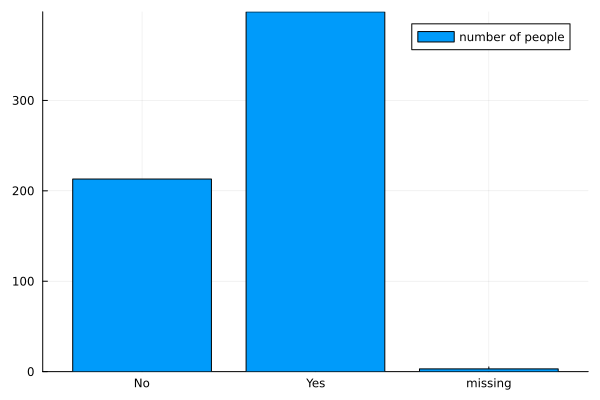

In [9]:
#繪製長條圖
using StatsPlots
bar(gdf_summary[!, :nrow], xticks=(1:3, gdf_summary[!, :Married]),labels="number of people")

In [11]:
#ApplicantIncome次數分配表
using CategoricalArrays
using Statistics
ApplicantIncome_edge = 100:100:90000 #最小值、區間、最大值
df.ApplicantIncome_bin = cut(df[!,:ApplicantIncome], ApplicantIncome_edge)
combine(groupby(df, :ApplicantIncome_bin), nrow)

Row,ApplicantIncome_bin,nrow
,Cat…,Int64
1,"[100, 200)",1
2,"[200, 300)",1
3,"[400, 500)",1
4,"[600, 700)",2
5,"[1000, 1100)",3
6,"[1200, 1300)",1
7,"[1300, 1400)",1
8,"[1400, 1500)",1
9,"[1500, 1600)",2


In [13]:
#LoanAmount次數分配表
using CategoricalArrays
using Statistics
LoanAmount_edge = 0:10:800 #最小值、區間、最大值
df.LoanAmount_bin = cut(df[!,:LoanAmount], LoanAmount_edge)
combine(groupby(df, :LoanAmount_bin), nrow)

Row,LoanAmount_bin,nrow
,Cat…?,Int64
1,missing,22
2,"[0, 10)",1
3,"[10, 20)",1
4,"[20, 30)",3
5,"[30, 40)",4
6,"[40, 50)",10
7,"[50, 60)",14
8,"[60, 70)",15
9,"[70, 80)",24


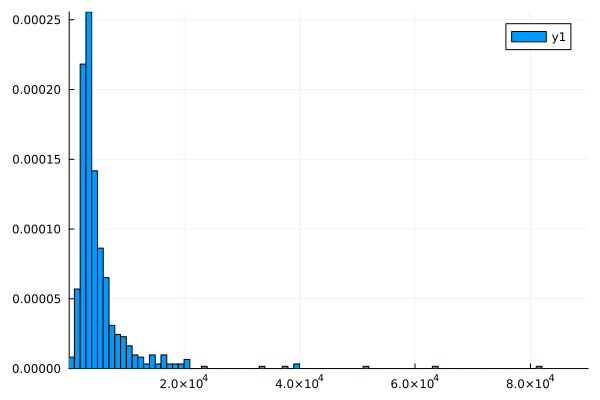

In [14]:
#繪製ApplicantIncome直方圖
using Plots
b_range = range(100, 90000, length=50)
histogram(df[!,:ApplicantIncome],ApplicantIncome_bins=b_range)
histogram(df[!,:ApplicantIncome],ApplicantIncome=b_range, normalize=:pdf)
xlims!(100, 90000)

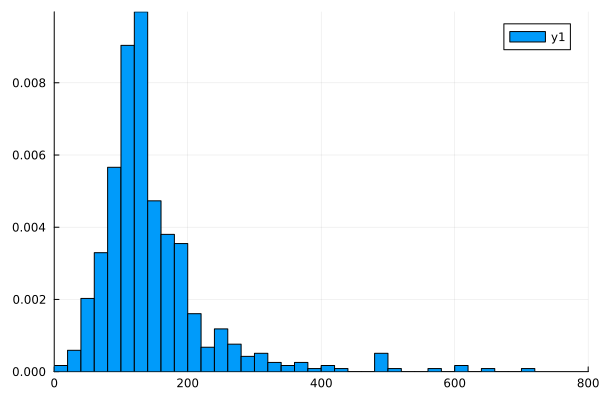

In [15]:
#繪製LoanAmount直方圖
using Plots
b_range = range(0, 800, length=10)
histogram(df[!,:LoanAmount],LoanAmount_bins=b_range)
histogram(df[!,:LoanAmount],LoanAmount_bins=b_range, normalize=:pdf)
xlims!(0, 800)

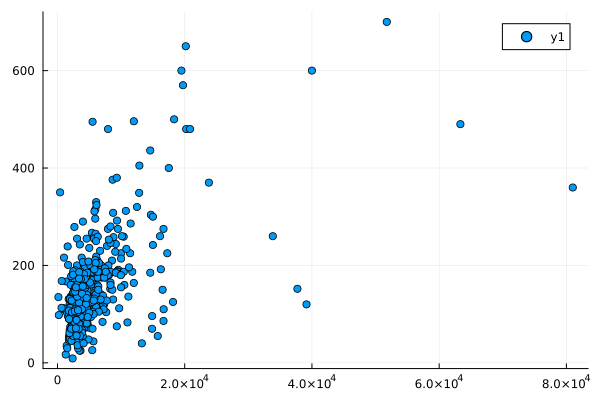

In [16]:
#繪製ApplicantIncome與LoanAmount散布圖
using StatsPlots
scatter(df[!,:ApplicantIncome], df[!,:LoanAmount])

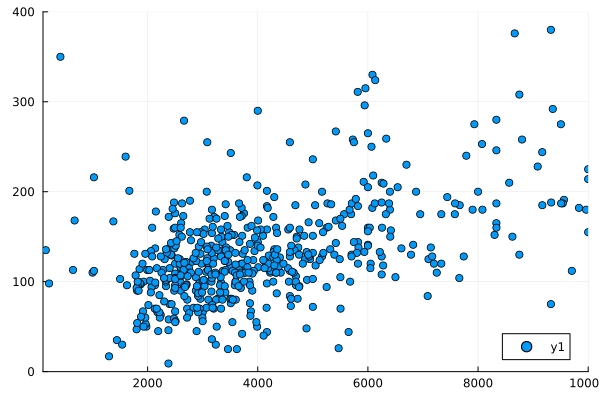

In [18]:
scatter(df[!,:ApplicantIncome], df[!,:LoanAmount])
xlims!(100, 10000)
ylims!(0, 400)